Dataset provided by Kaggle, this is the [Link](https://www.kaggle.com/datasets/santoshd3/bank-customers) to that dataset

### Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

### Data Acquisition


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataPath = "/content/drive/MyDrive/Second_Assignment/Churn_Modeling.csv"
df = pd.read_csv(dataPath)

### Data Overview

Number of Rows and Columns

In [ ]:
df.shape

(10000, 14)

Display the datatype of each features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,Germany,Male,29,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0


### Data Cleaning & Pre-Processing

Check of Duplicated Values

In [ ]:
df.duplicated().values.any()

False

Check for Null Values

In [ ]:
df.isna().values.any()

False

Remove Unecessary Features That Does Not Support our Analysis

In [ ]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

Plot the data to analyze about the outliers

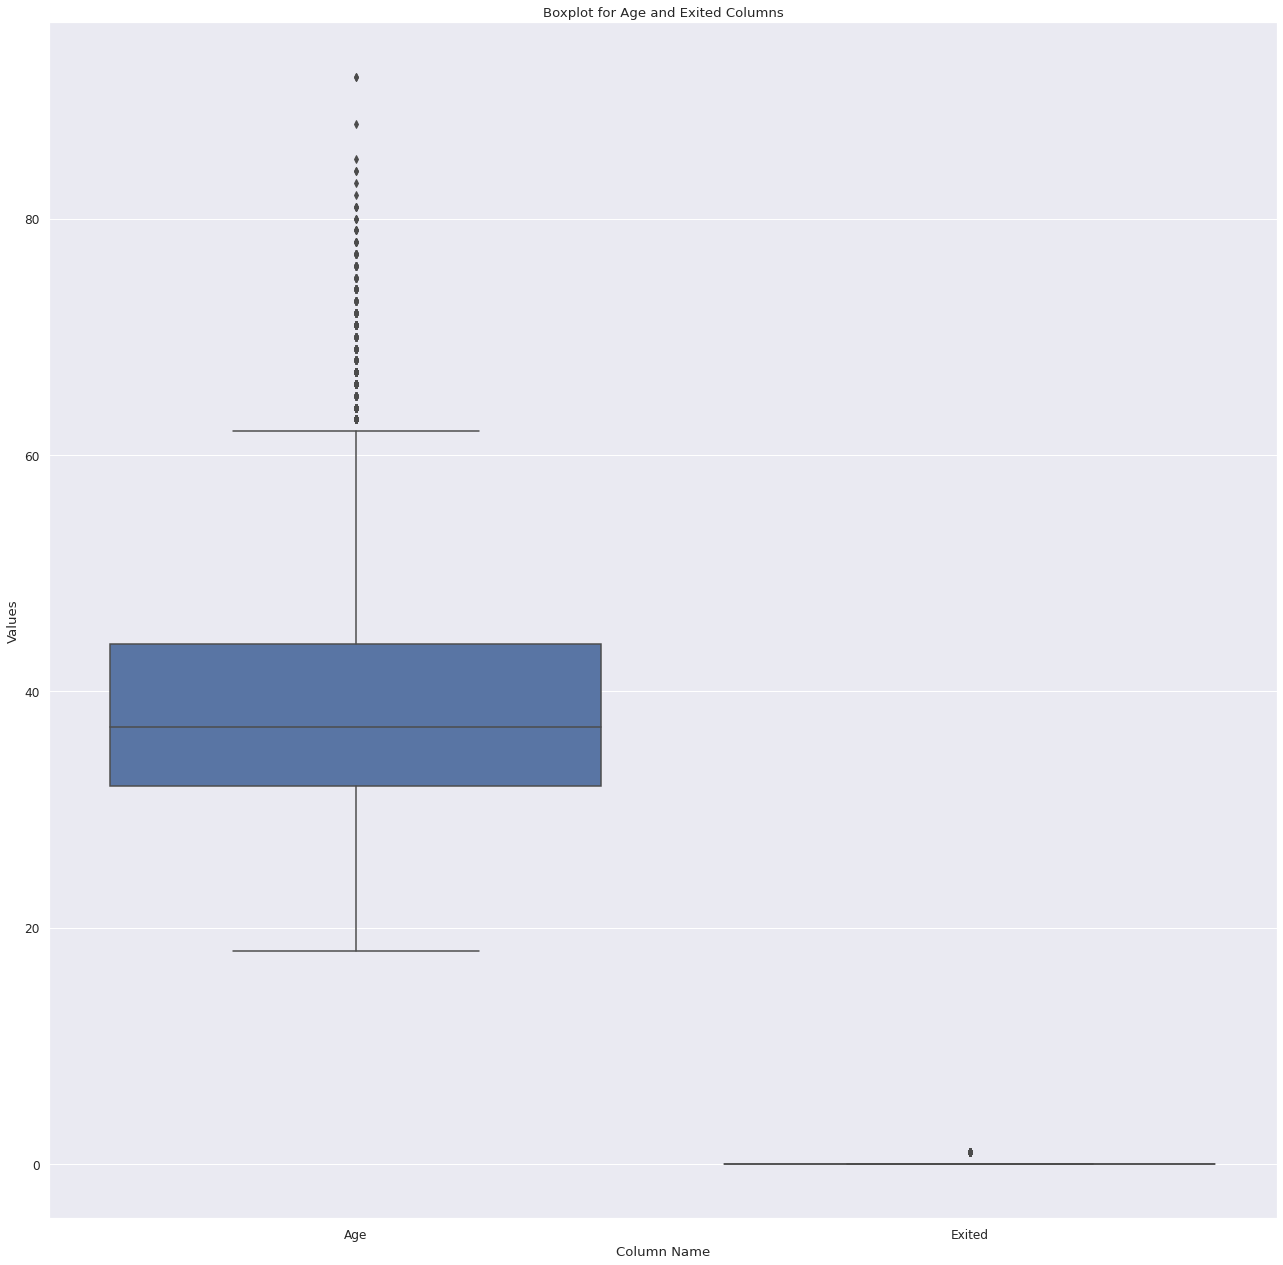

In [ ]:
sns.boxplot(data=df[['Age', 'Exited']])

plt.title("Boxplot for Age and Exited Columns")
plt.xlabel("Column Name")
plt.ylabel("Values")

plt.show()

Check For Outliers

In [ ]:
Q1 = df[['Age', 'Exited']].quantile(0.25)
Q3 = df[['Age', 'Exited']].quantile(0.75)
IQR = Q3 - Q1
range_min = Q1 - 1.5 * IQR
range_max = Q3 + 1.5 * IQR
combined_outliers = df.loc[(df['Age'] < range_min['Age']) | (df['Age'] > range_max['Age']) | (df['Exited'] < range_min['Exited']) | (df['Exited'] > range_max['Exited'])]
print(f"Combined outliers: {len(combined_outliers)}, Index: {list(combined_outliers.index)}")

Combined outliers: 2323, Index: [0, 2, 5, 7, 16, 22, 30, 35, 41, 43, 46, 47, 53, 54, 58, 70, 81, 85, 86, 88, 90, 104, 105, 109, 114, 118, 125, 126, 127, 138, 139, 143, 144, 151, 155, 158, 164, 166, 168, 172, 179, 181, 184, 190, 202, 203, 206, 208, 215, 218, 219, 223, 224, 227, 228, 230, 234, 235, 237, 238, 243, 245, 249, 252, 268, 271, 276, 279, 282, 293, 297, 306, 308, 310, 316, 322, 327, 333, 335, 338, 339, 340, 357, 361, 364, 371, 376, 379, 385, 392, 393, 399, 406, 413, 416, 420, 422, 429, 430, 433, 444, 448, 458, 463, 467, 471, 475, 484, 487, 493, 494, 499, 502, 514, 516, 518, 520, 528, 535, 538, 539, 543, 544, 551, 555, 557, 559, 563, 566, 567, 571, 573, 581, 584, 585, 586, 589, 590, 598, 600, 602, 603, 612, 615, 617, 630, 631, 634, 640, 643, 644, 645, 653, 658, 677, 678, 685, 687, 688, 696, 697, 705, 714, 720, 721, 729, 733, 734, 736, 743, 761, 762, 764, 766, 767, 769, 770, 774, 776, 777, 784, 805, 807, 811, 813, 817, 823, 838, 840, 843, 851, 856, 859, 860, 861, 867, 868, 871, 88

Remove the Outliers

In [ ]:
Q1 = df[['Age', 'Exited']].quantile(0.25)
Q3 = df[['Age', 'Exited']].quantile(0.75)
IQR = Q3 - Q1
range_min = Q1 - 1.5 * IQR
range_max = Q3 + 1.5 * IQR
combined_outliers = df.loc[(df['Age'] < range_min['Age']) | (df['Age'] > range_max['Age']) | (df['Exited'] < range_min['Exited']) | (df['Exited'] > range_max['Exited'])]
df = df.drop(combined_outliers.index)

Label Encoding To Convert Categorical to Numerical

In [ ]:
le=LabelEncoder()
df["Geography"]=le.fit_transform(df["Geography"])
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


Feature Scaling

In [ ]:
scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


### Data Visualization

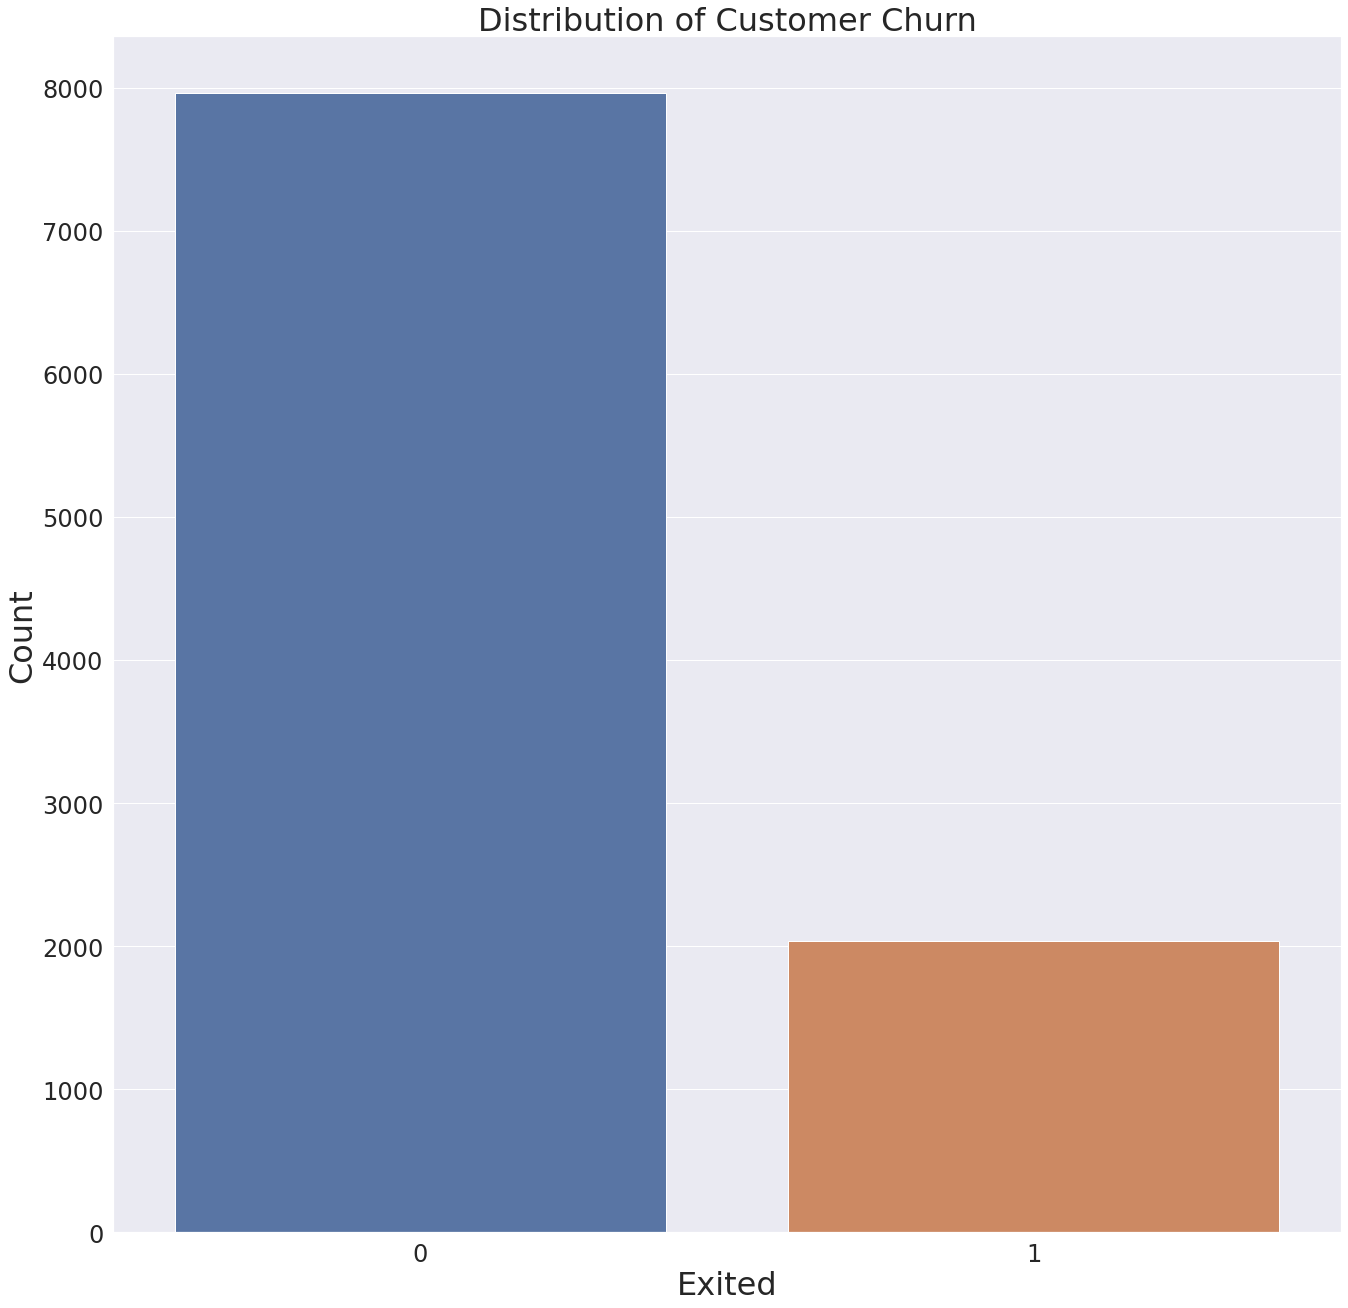

In [ ]:
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn', fontsize=32)
plt.xlabel('Exited', fontsize=32)
plt.ylabel('Count', fontsize=32)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

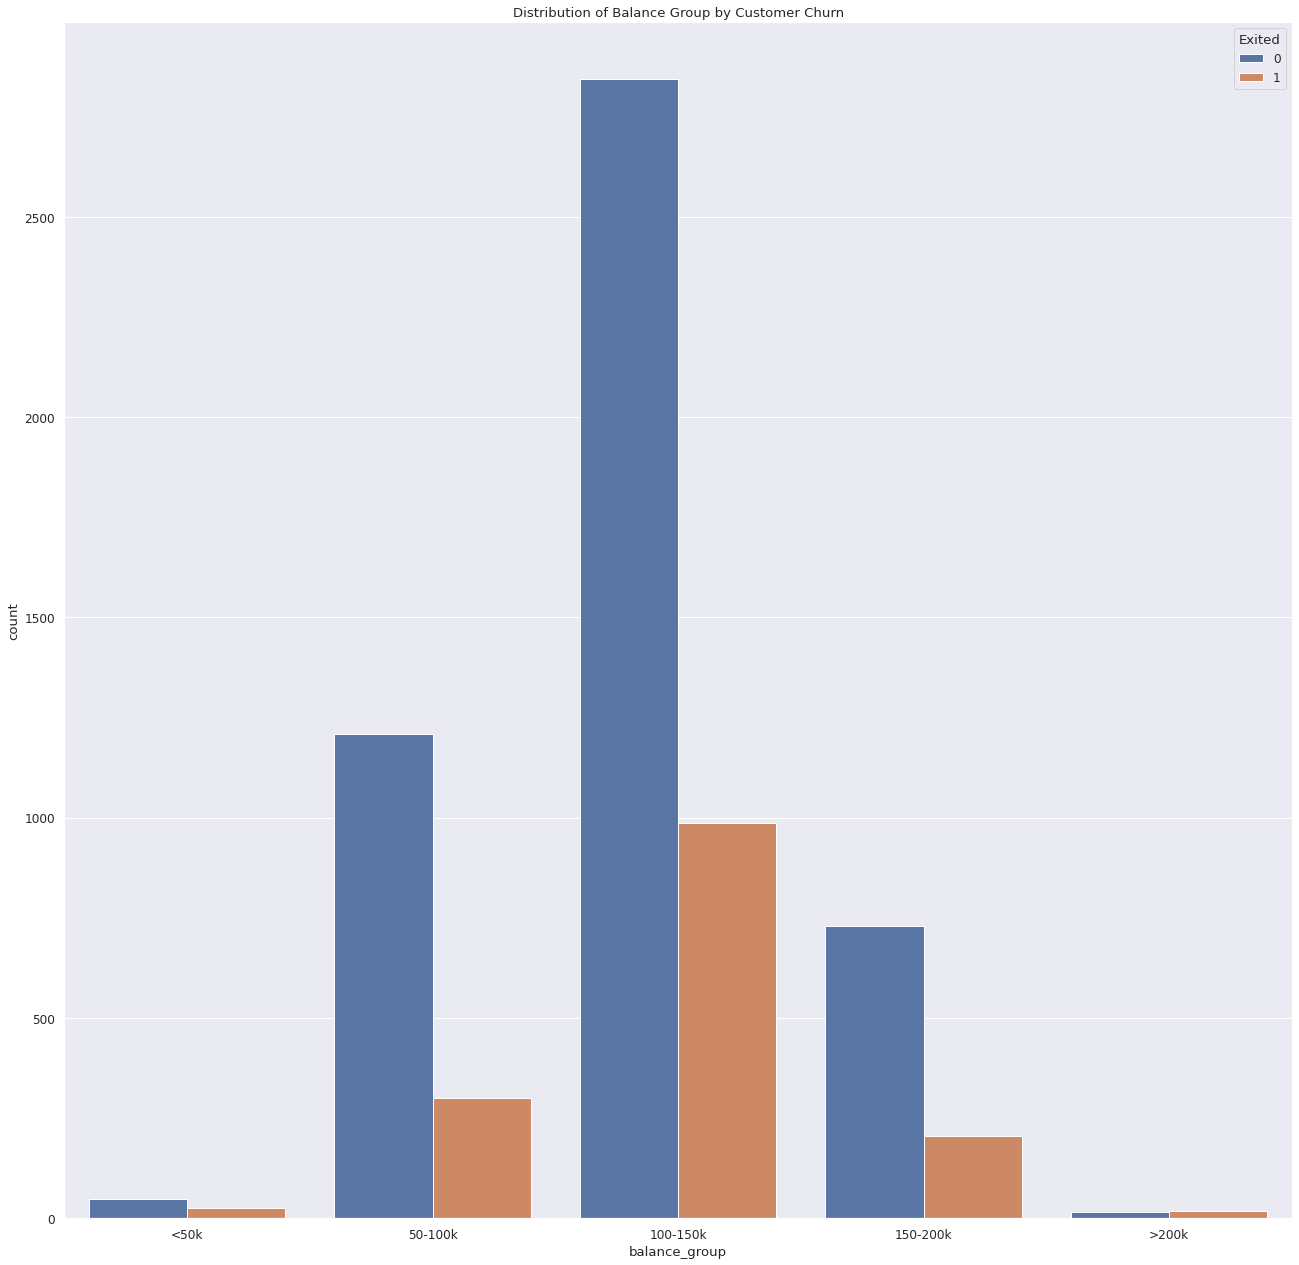

In [ ]:
# Balance Analysis
df['balance_group'] = pd.cut(df['Balance'], bins=[0, 50000, 100000, 150000, 200000, np.inf], labels=['<50k', '50-100k', '100-150k', '150-200k', '>200k'])
sns.countplot(x='balance_group', hue='Exited', data=df)
plt.title('Distribution of Balance Group by Customer Churn')
plt.show()

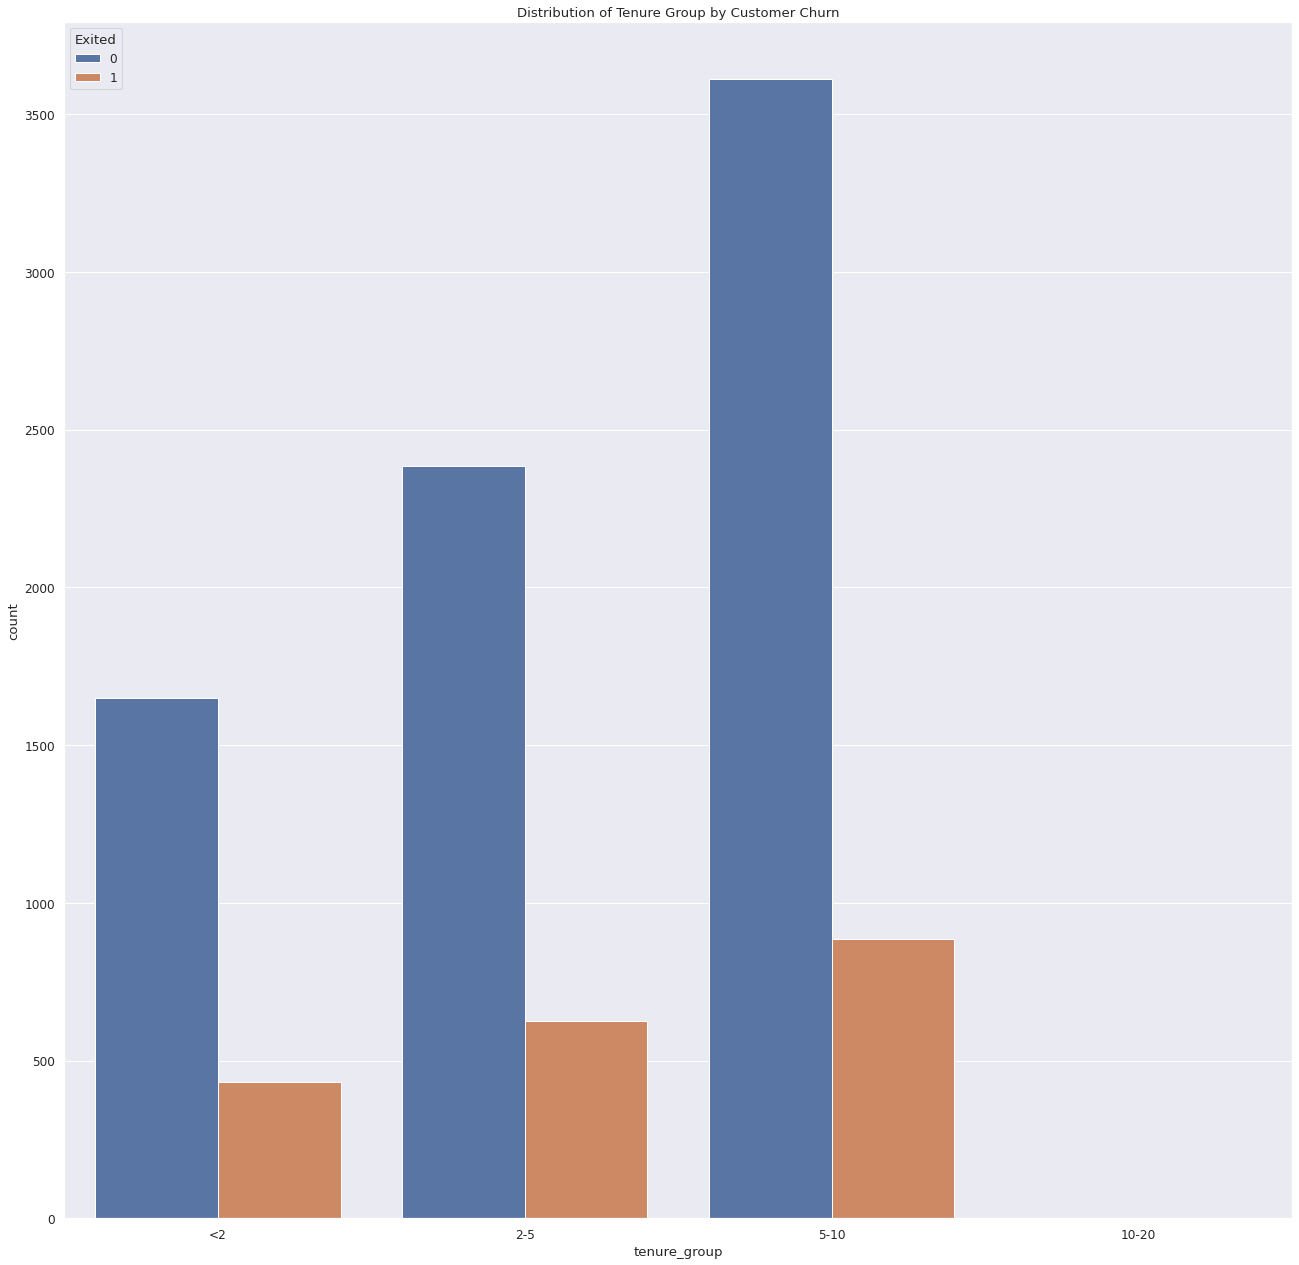

In [ ]:
df['tenure_group'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 10, 20], labels=['<2', '2-5', '5-10', '10-20'])
sns.countplot(x='tenure_group', hue='Exited', data=df)
plt.title('Distribution of Tenure Group by Customer Churn')
plt.show()

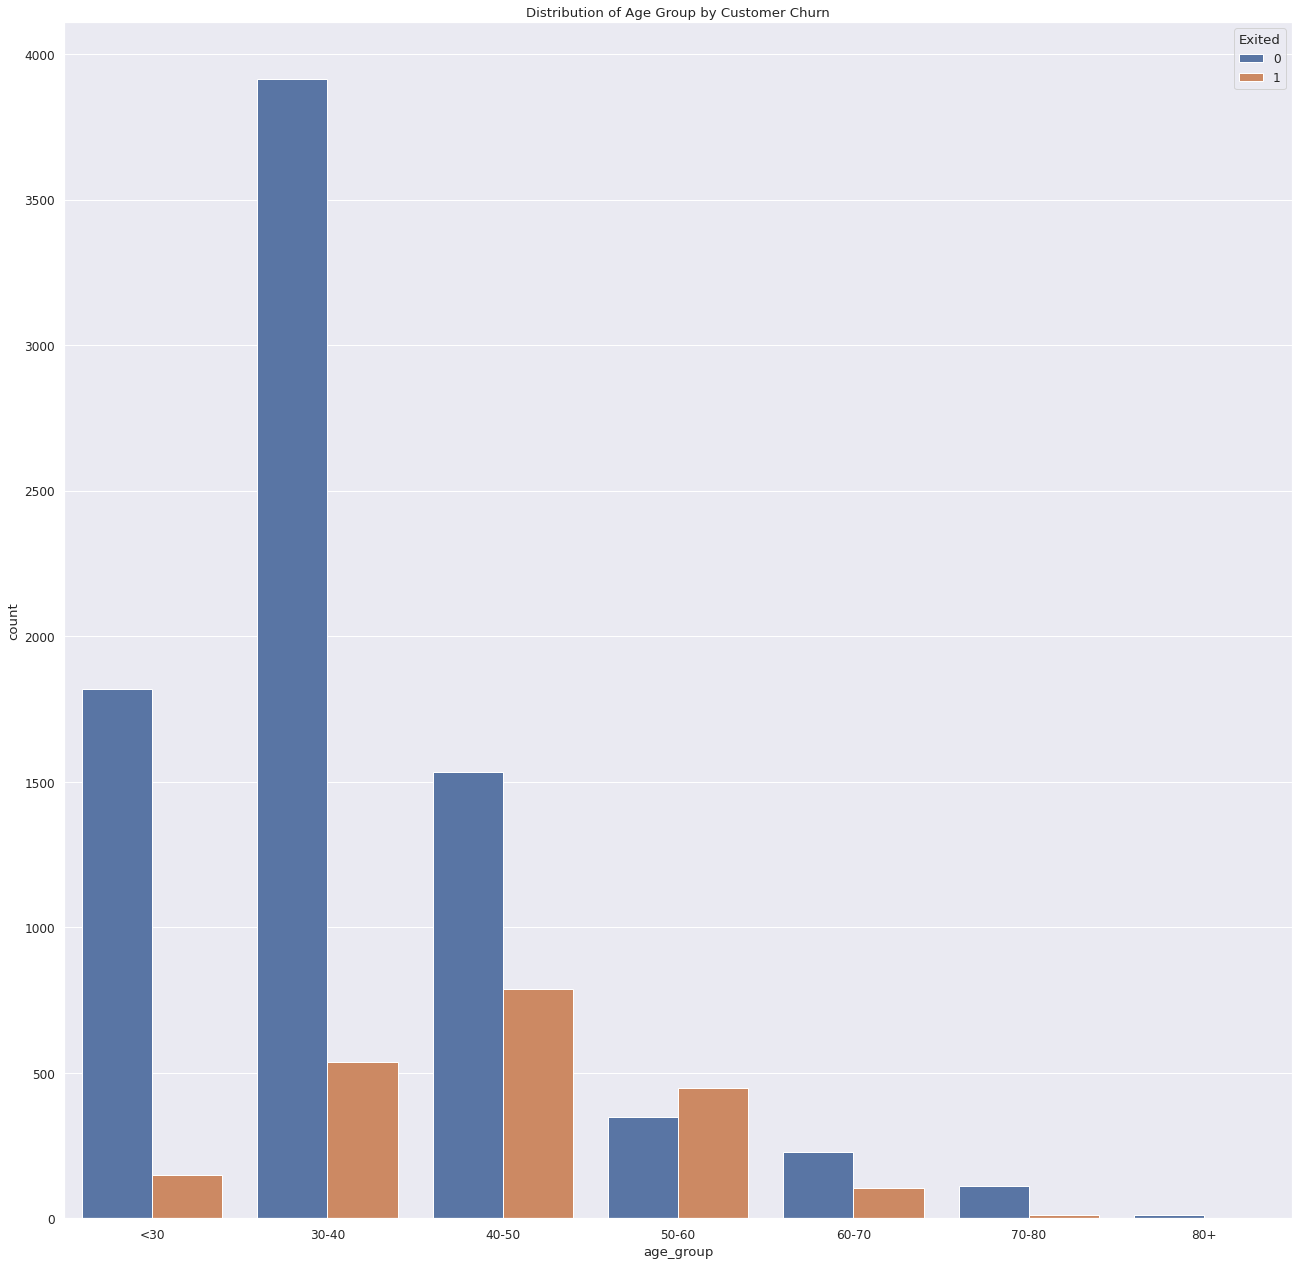

In [ ]:
# Age Group Analysis
df['age_group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'])
sns.countplot(x='age_group', hue='Exited', data=df)
plt.title('Distribution of Age Group by Customer Churn')
plt.show()

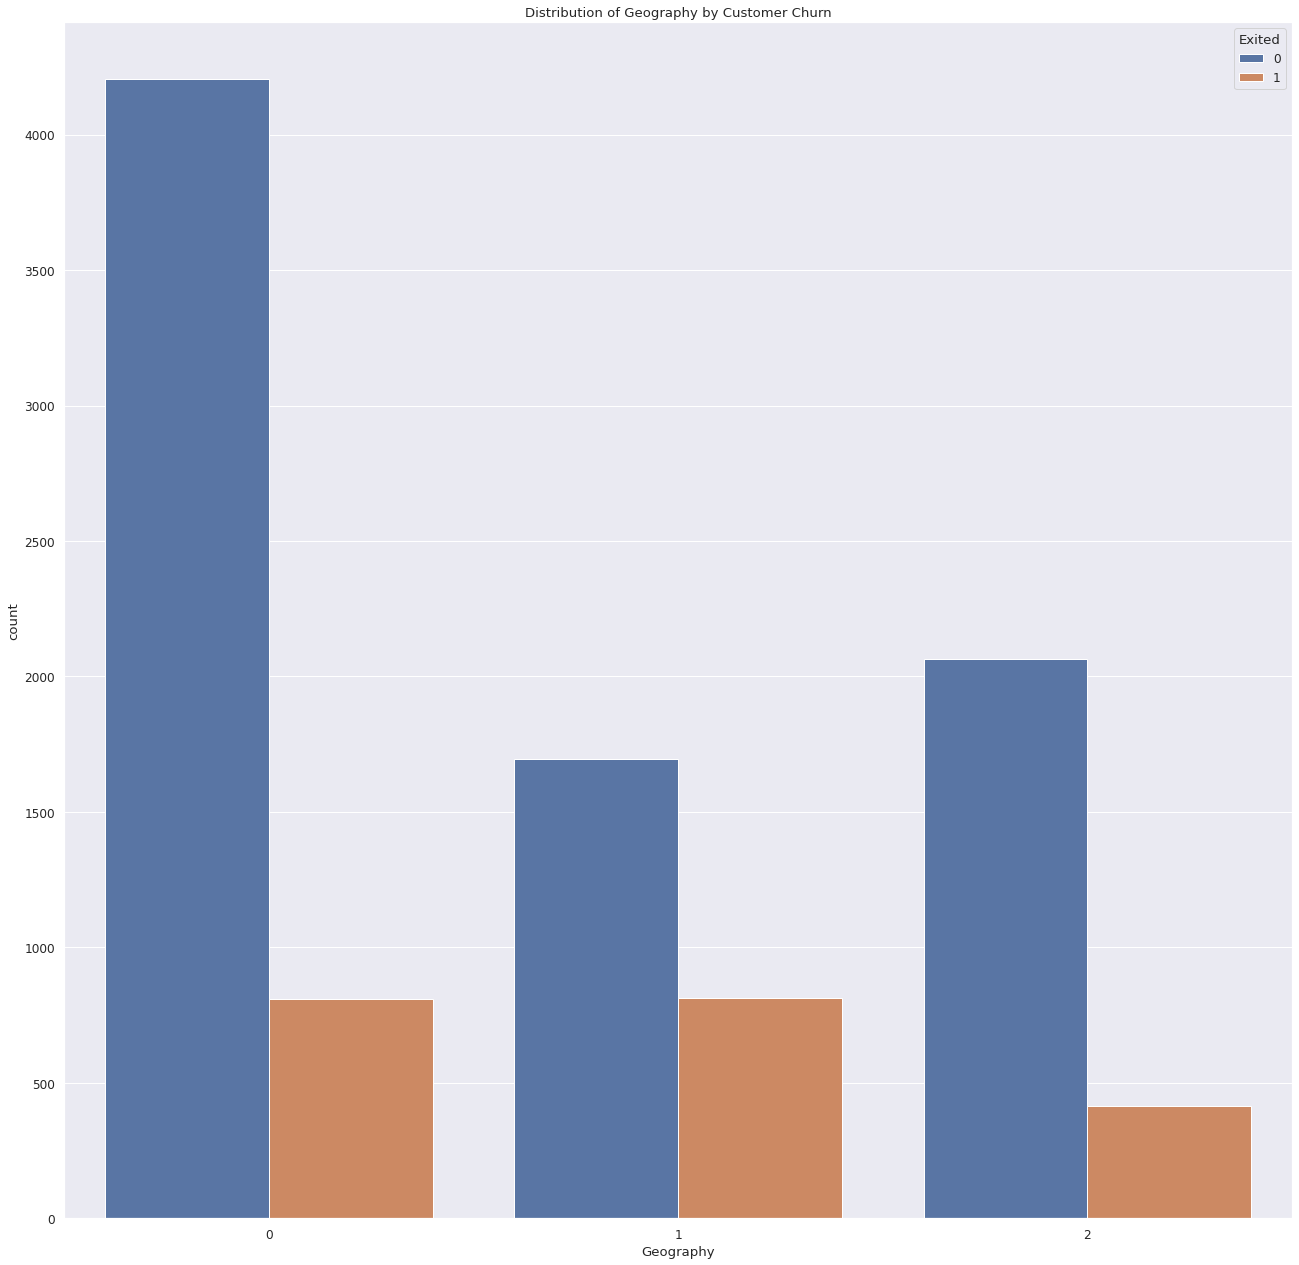

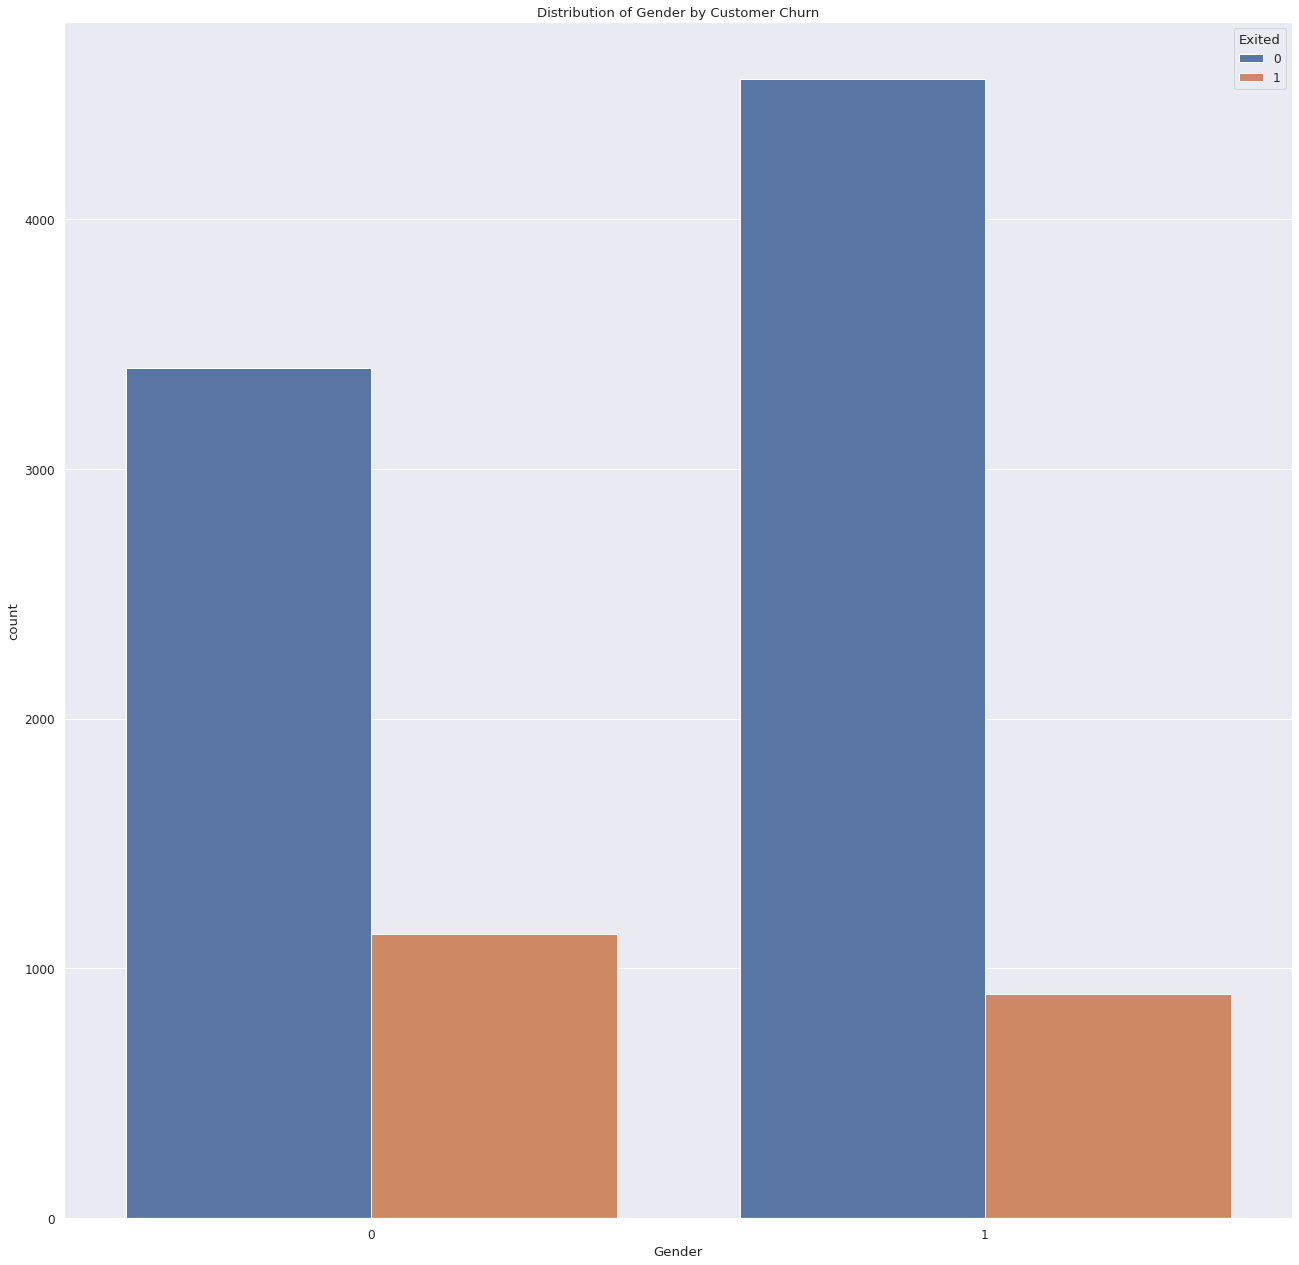

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Distribution of Geography by Customer Churn')
plt.show()

sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Distribution of Gender by Customer Churn')
plt.show()

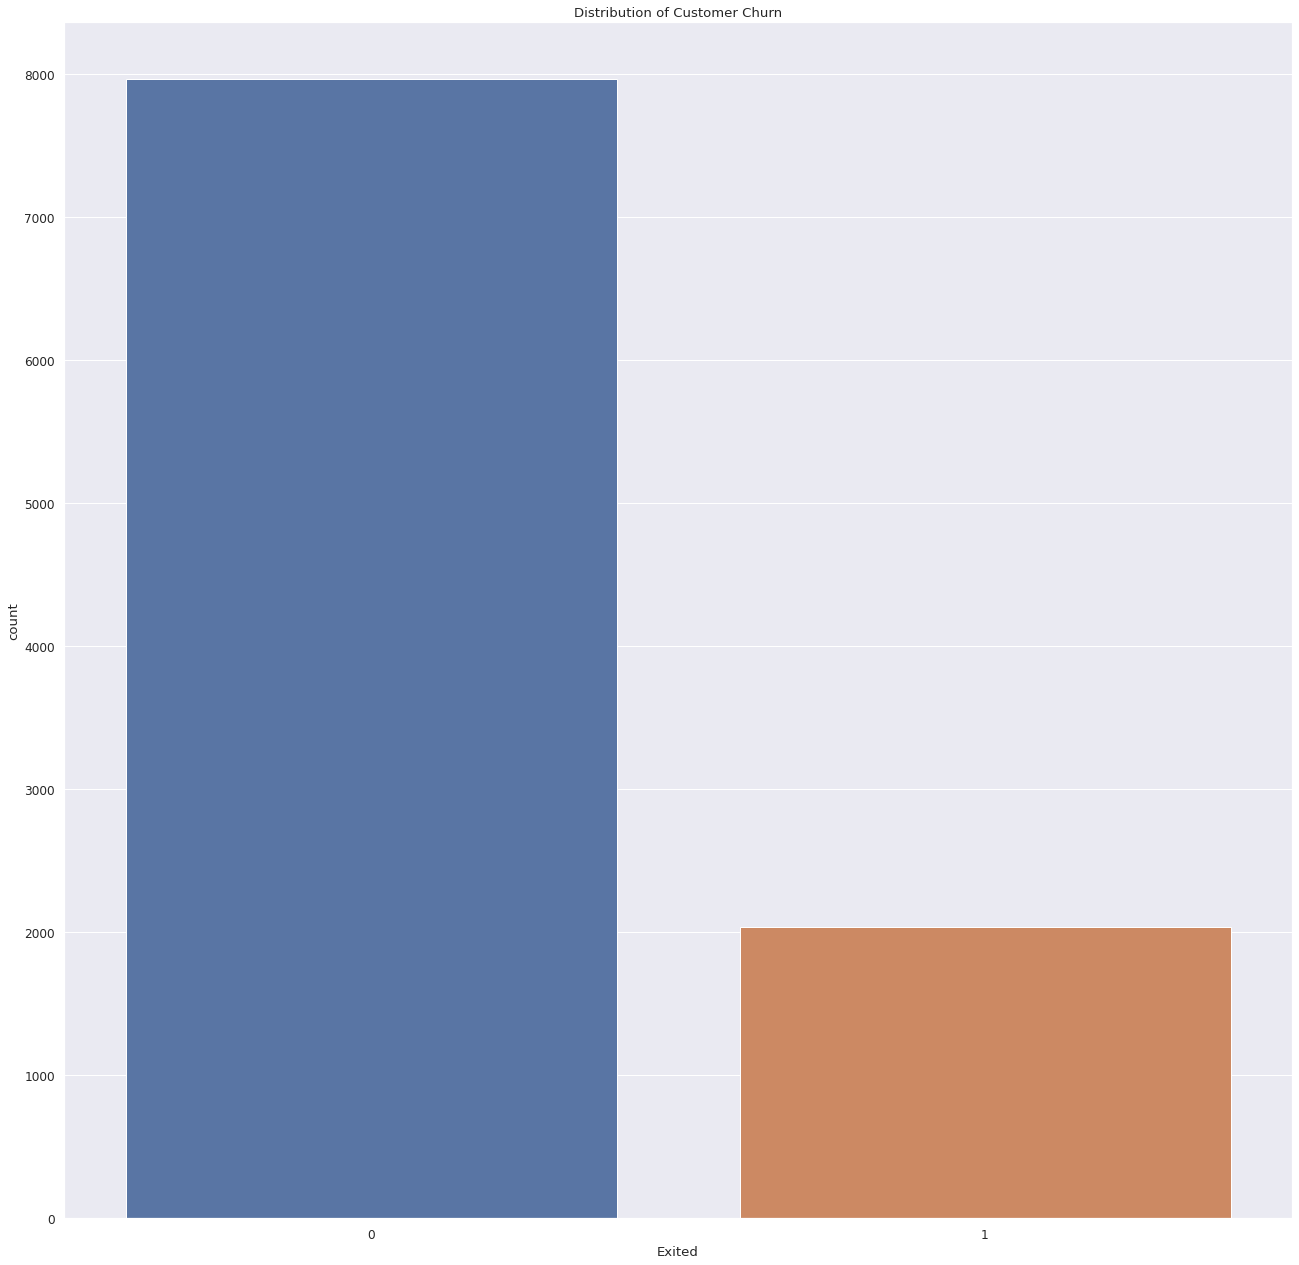

In [ ]:
# Target Variable Distribution
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn')
plt.show()


Find Correlation

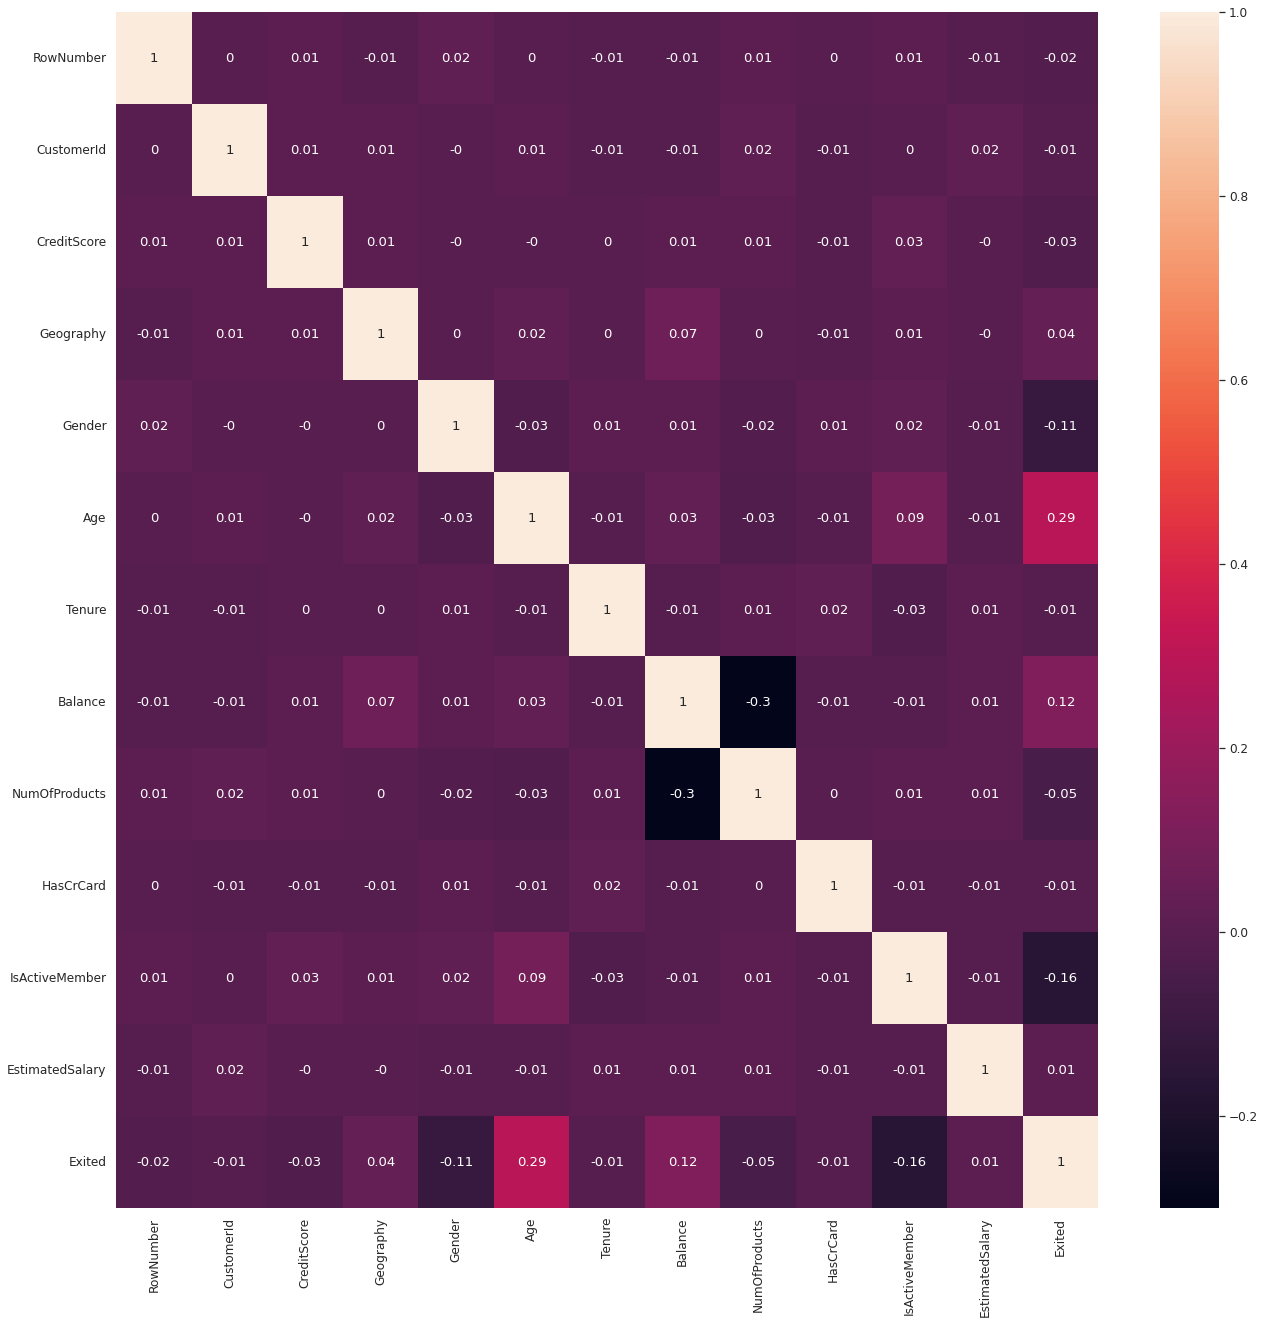

In [ ]:
sns.set(font_scale=1.1,rc={"figure.figsize": [22, 22]})
sns.heatmap(df.corr().round(2),annot=True);

KeyboardInterrupt: ignored

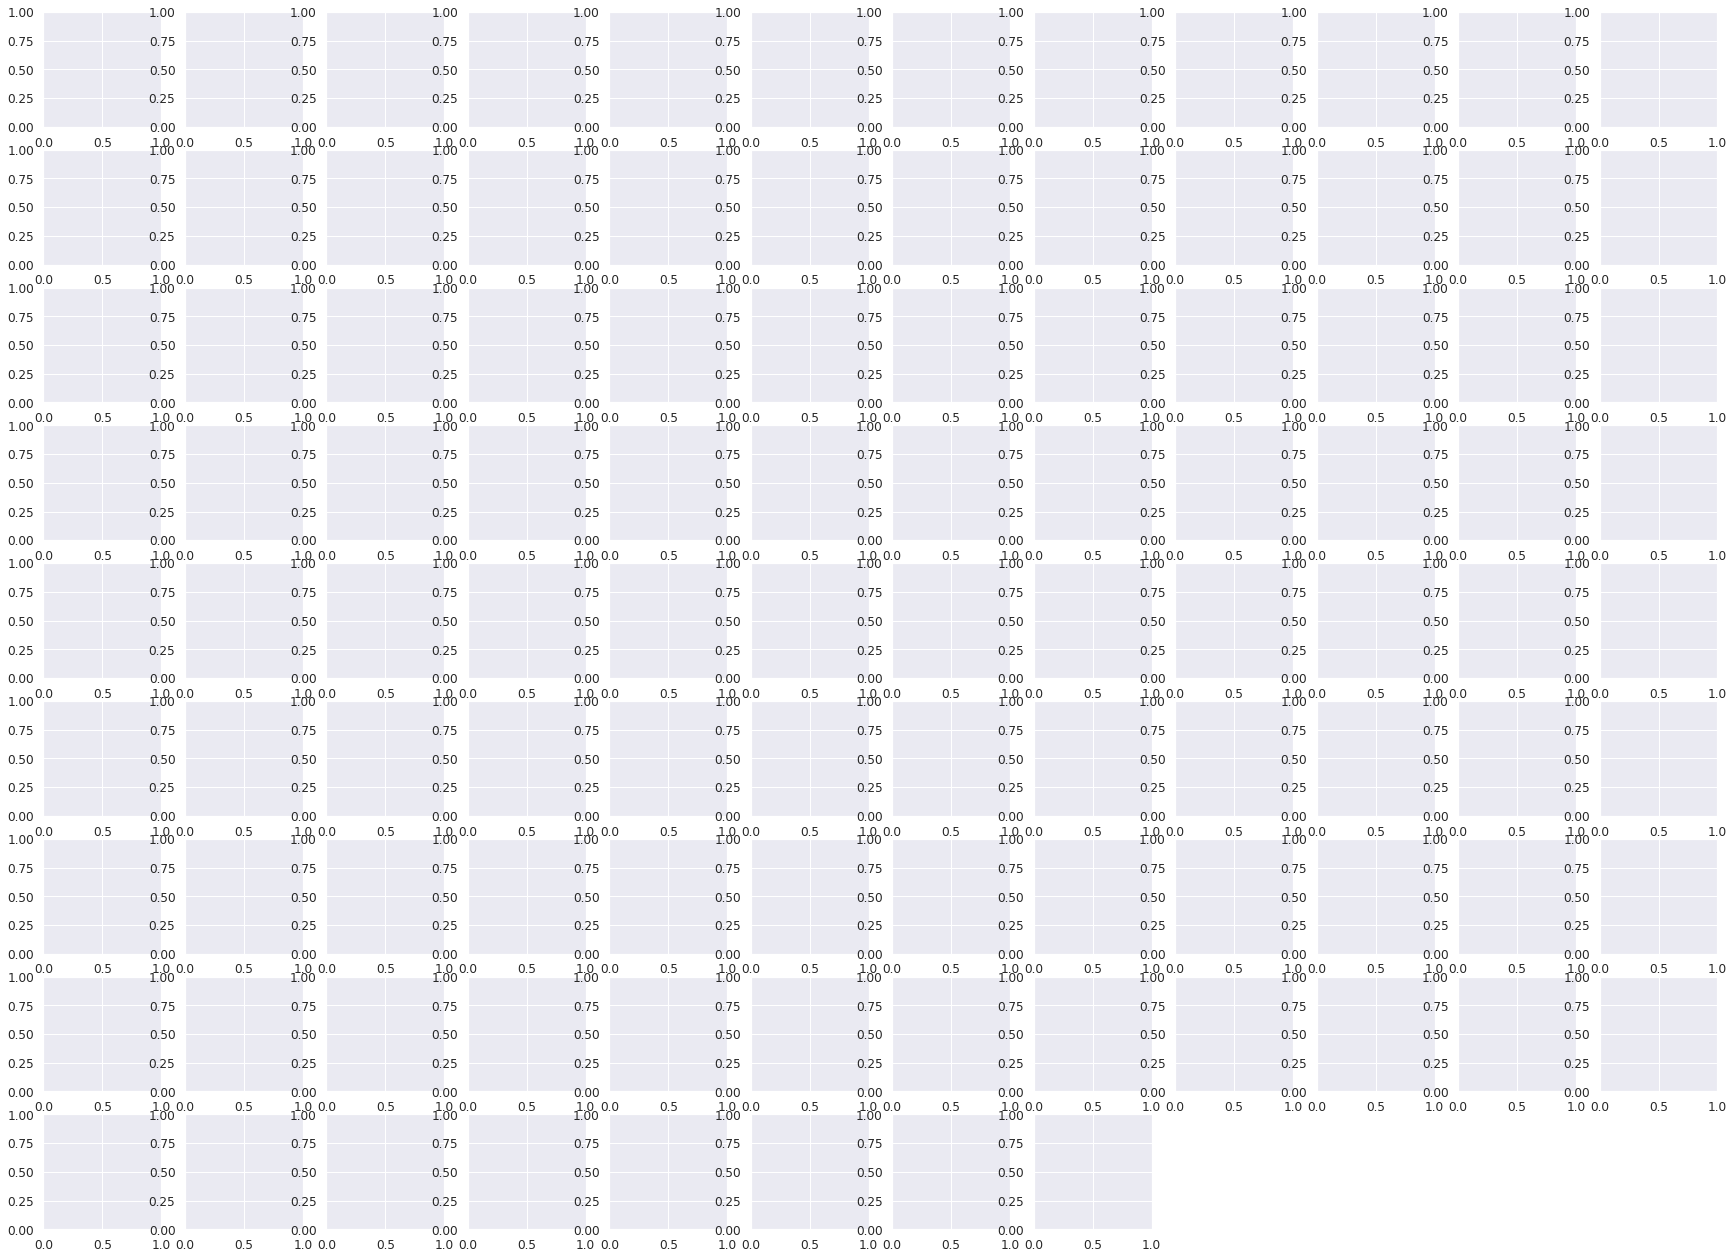

In [ ]:
sns.pairplot(df,hue='Exited')
plt.show()

In [ ]:
# Group by country and count the Balance of Each Customer in each category
category_counts = df.groupby('Geography')['Balance'].count().sort_values(ascending=False)[:10]
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4DB27D', '#E69F00', '#F0E442', '#D55E00']

# Create a pie chart of the top 10 categories
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
ax.set_title('Distribution of Top 10 country and count the Balance of Each Customer in each Country', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Group the dataset by Age and calculate the average of Estimated Salary
estimated_salary = df.groupby("Age")["EstimatedSalary"].mean()
# Sort the products by rating count in descending order and select the top 10
age = estimated_salary.sort_values(ascending=False)[:5]

# Create the bar chart
sns.barplot(x=age.index, y=age.values, color="royalblue")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Top 5 age with highest estimated salary")
plt.show()

In [ ]:
# Set the font size for all plots
sns.set(font_scale=1.5)

# Create a dictionary to map old values to new ones
geography_map = {0: 'France', 1: 'Germany', 2: 'Spain'}

# Calculate churn rate by geography
churn_rate_by_geography = df.groupby('Geography')['Exited'].mean().rename(index=geography_map)

# Create bar plot of churn rate by geography
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_geography.index, y=churn_rate_by_geography.values)
plt.title('Churn rate by Geography')
plt.ylabel('Churn rate')
plt.show()

In [ ]:
# Calculate churn rate by gender
churn_rate_by_gender = df.groupby('Gender')['Exited'].mean()

# Create bar plot of churn rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values)
plt.title('Churn rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn rate')
plt.show()

In [ ]:
# Create a dictionary to map old values to new ones
gender_map = {0: 'Female', 1: 'Male'}

# Calculate churn rate by gender
churn_rate_by_gender = df.groupby('Gender')['Exited'].mean().rename(index=gender_map)

# Create bar plot of churn rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values)
plt.title('Churn rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn rate')
plt.show()

In [ ]:
# Calculate churn rate by credit card ownership
churn_rate_by_creditcard = df.groupby('HasCrCard')['Exited'].mean()

# Create bar plot of churn rate by credit card ownership
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_creditcard.index.map({0: 'No', 1: 'Yes'}), y=churn_rate_by_creditcard.values)
plt.title('Churn rate by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Churn rate')
plt.show()

In [ ]:
# Calculate churn rate by active membership
churn_rate_by_membership = df.groupby('IsActiveMember')['Exited'].mean()

# Create bar plot of churn rate by active membership
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_membership.index.map({0: 'Not Active', 1: 'Active'}), y=churn_rate_by_membership.values)
plt.title('Churn rate by Active Membership')
plt.xlabel('Is Active Member')
plt.ylabel('Churn rate')
plt.show()


In [ ]:
# Subset data into two groups based on whether they exited or not
exited_customers = df[df['Exited'] == 1]
active_customers = df[df['Exited'] == 0]

# Create histograms for continuous features
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(exited_customers[feature], kde=True, color='orange', alpha=0.5, label='Exited')
    sns.histplot(active_customers[feature], kde=True, color='blue', alpha=0.5, label='Active')
    plt.title(f'{feature} Distribution by Customer Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# # Drop irrelevant features
# df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'balance_group', 'tenure_group', 'age_group'], axis=1)

# # Convert categorical features to dummy variables
# df = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Create a Random Forest Classifier model and fit it to the data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)

# Get the feature importances
importances = rfc.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a dataframe to display the feature details and their importance scores
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance score in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature details and their importance scores
print(feature_importances)

### Data Splitting & Balancing

Checking the data for imbalance

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Balancing the data using Synthetic Minority Over-sampling Technique (SMOTE)

In [ ]:
X = df[['Age']]
y = df['Exited']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_df = pd.DataFrame({'Age': X_resampled.squeeze(), 'Exited': y_resampled})

balanced_df['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Split Dataset Into 60 20 20 (Train Test Validate)

In [ ]:
x = balanced_df['Age'].values.reshape(-1, 1)
y = balanced_df['Exited']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

### Logistic Regression

Define the hyperparameter using Grid Search Cross Validation

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='f1')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
print("Best F1 score:", grid_search.best_score_)

Best hyperparameters: {'C': 0.01}
Best F1 score: 0.7013303859189489


Train the Model with the tuned hyperparameter, c = 0.01

In [ ]:
best_logreg = LogisticRegression(C=grid_search.best_params_['C'])
best_logreg.fit(x_train, y_train)

LogisticRegression(C=0.01)

Testing with input for the trained model

In [ ]:
def predict_churn():
    age = float(input("Enter age: "))
    feature_array = np.array([age]).reshape(1,-1)
    prediction = best_logreg.predict(feature_array)

    if prediction == 1:
        print("The customer is likely to churn.")
    else:
        print("The customer is not likely to churn.")

predict_churn()

Enter age: 10
The customer is not likely to churn.


### Support Vector Machines

Define the hyperparameter using Grid Search Cross Validation

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}

#create the svm model
svm = SVC(kernel='rbf')

#create the grid search with 5-fold and f1 measure
clf = GridSearchCV(svm, param_grid, cv=5, scoring='f1')

#fit the grid search with the balanced training data
clf.fit(x_train, y_train)

#get the best hyperparameter
best_params = clf.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'C': 1, 'gamma': 'auto'}


In [ ]:
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(x_train, y_train)

SVC(C=1, gamma='auto')

Test for Input

In [ ]:
age = float(input("Enter age: "))

# create a numpy array for the input
input_data = np.array([[age]])

# make the prediction using the trained model
prediction = best_svm.predict(input_data)
if prediction == 1:
  print("The customer is likely to churn.")
else:
  print("The customer is not likely to churn.")

Enter age: 45
The customer is likely to churn.


### Evaluation & Result

**Support Vector Machines**

In [ ]:
y_pred_test = best_svm.predict(x_test)
print("\nPerformance Result of Support Vector Machines on Test Set:")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_test))
print('F1 score:', f1_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))


Performance Result of Support Vector Machines on Test Set:
Confusion matrix:
 [[2186 1031]
 [ 920 2234]]
F1 score: 0.6960585761021966
Precision: 0.6842266462480857
Recall: 0.7083069118579581


**Logistic Regression Evaluation**

In [ ]:
y_pred_test = best_logreg.predict(x_test)
cm_test = confusion_matrix(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
print("\nPerformance Result of Logistic Regression on Test Set:")
print("Confusion matrix:\n", cm_test)
print("F1 score:", f1_test)
print("Precision:", precision_test)
print("Recall:", recall_test)


Performance Result of Logistic Regression on Test Set:
Confusion matrix:
 [[2319  898]
 [1040 2114]]
F1 score: 0.6856957508919883
Precision: 0.701859229747676
Recall: 0.6702599873176919
